In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [35]:
data_vals_reco = np.load("inputs/data_vals_reco.npy")
MC_vals_reco = np.load("inputs/MC_vals_reco.npy")
MC_vals_truth = np.load("inputs/MC_vals_truth.npy")

data_pass_reco = np.load("inputs/data_pass_reco.npy")
MC_pass_reco = np.load("inputs/MC_pass_reco.npy")
MC_pass_truth = np.load("inputs/MC_pass_truth.npy")

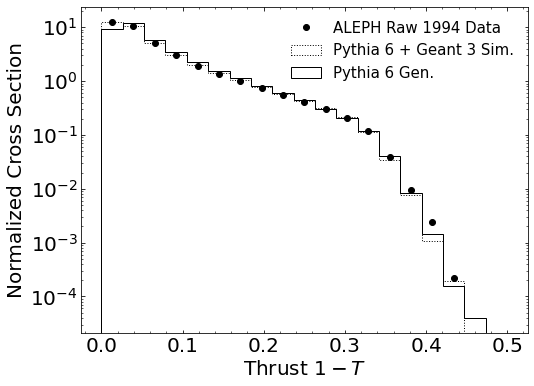

In [37]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

n,b = np.histogram(1.-data_vals_reco,density=True,bins=np.linspace(0,0.5,20))
plt.plot(0.5*(b[0:-1]+b[1:]),n,marker='o',color='black',ls="",label="ALEPH Raw 1994 Data")
plt.hist(1.-MC_vals_reco,density=True,bins=np.linspace(0,0.5,20),histtype="step",color="black",ls=":",label="Pythia 6 + Geant 3 Sim.")
plt.hist(1.-MC_vals_truth,density=True,bins=np.linspace(0,0.5,20),histtype="step",color="black",label="Pythia 6 Gen.")
plt.xlabel("Thrust $1-T$",fontsize=20)
plt.ylabel("Normalized Cross Section",fontsize=20)
plt.yscale("log")
plt.legend(frameon=False,fontsize=15)

Text(0, 0.5, 'Reco Thrust $1-T$')

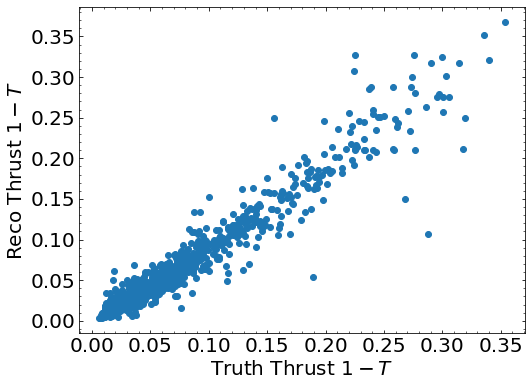

In [42]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.scatter(1.-MC_vals_truth[MC_vals_reco>-1][0:1000],1.-MC_vals_reco[MC_vals_reco>-1][0:1000])
plt.xlabel("Truth Thrust $1-T$",fontsize=20)
plt.ylabel("Reco Thrust $1-T$",fontsize=20)

In [46]:
print(np.sum(data_pass_reco)/len(data_pass_reco))
print(np.sum(MC_pass_reco)/len(MC_pass_reco))
print(np.sum(MC_pass_truth)/len(MC_pass_truth))

0.9713725978439185
0.7721143310169044
1.0


In [120]:
#Inherent uncertainty on detector-level data and particle-level MC
data_boots = []
MC_boots = []
for k in range(1000):
    if (k%100==0):
        print(k,k/1000.)
    n_data_boot,_ = np.histogram(1.-data_vals_reco,density=True,bins=np.linspace(0,0.5,20),weights=np.random.poisson(1,len(data_vals_reco)))
    n_MC_boot,_ = np.histogram(1.-MC_vals_truth,density=True,bins=np.linspace(0,0.5,20),weights=np.random.poisson(1,len(MC_vals_truth)))
    data_boots += [n_data_boot]
    MC_boots += [n_MC_boot]

0 0.0
100 0.1
200 0.2
300 0.3
400 0.4
500 0.5
600 0.6
700 0.7
800 0.8
900 0.9


Text(1.0, 1.0, 'ALEPH Data 1994')

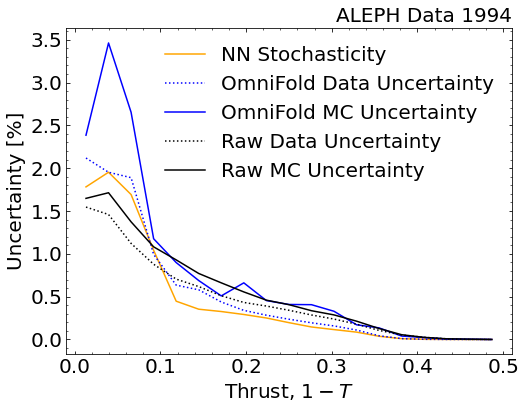

In [286]:
vals_all = []
vals_all_1 = []
vals_all_2 = []
for i in range(10):
    for j in range(30):
        vals_all += [np.load("storage_files/"+str(j*10+i)+"_0n_Omni_step2_thrust_iteration4.npy")]
        vals_all_1 += [np.load("storage_files/"+str(j*10+i)+"_1n_Omni_step2_thrust_iteration4.npy")]    
        vals_all_2 += [np.load("storage_files/"+str(j*10+i)+"_2n_Omni_step2_thrust_iteration4.npy")]
        pass
    pass
vals_all = np.array(vals_all)
vals_all_1 = np.array(vals_all_1)
vals_all_2 = np.array(vals_all_2)

vals_all = np.mean(np.reshape(vals_all,[10,30,19]),axis=0) #number to average, number of bootstraps
vals_all_1 = np.mean(np.reshape(vals_all_1,[10,30,19]),axis=0) #9, 10
vals_all_2 = np.mean(np.reshape(vals_all_2,[10,30,19]),axis=0) 

fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

plt.plot(0.5*(b[0:-1]+b[1:]),100*np.std(vals_all,axis=0),label="NN Stochasticity",color="orange")
plt.plot(0.5*(b[0:-1]+b[1:]),100*np.std(vals_all_1,axis=0),label="OmniFold Data Uncertainty",color="blue",ls=":")
plt.plot(0.5*(b[0:-1]+b[1:]),100*np.std(vals_all_2,axis=0),label="OmniFold MC Uncertainty",color="blue")
plt.plot(0.5*(b[0:-1]+b[1:]),100*np.std(data_boots,axis=0),label="Raw Data Uncertainty",color="black",ls=":")
plt.plot(0.5*(b[0:-1]+b[1:]),100*np.std(MC_boots,axis=0),label="Raw MC Uncertainty",color="black")
plt.xlabel("Thrust, $1-T$",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.ylabel("Uncertainty [%]",fontsize=20)
plt.title("ALEPH Data 1994",fontsize=20,loc="right")
#plt.ylim([0,0.06])
#plt.yscale("log")